**Exploratory Data Analysis**

- Load in your csv.gz's of results for each year extracted.
    - Concatenate the data into 1 dataframe for the remainder of the analysis.
- Once you have your data from the API, they would like you to perform some light EDA to show:
    - How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
        - Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
    - How many movies are there in each of the certification categories (G/PG/PG-13/R)?
    - What is the average revenue per certification category?
    - What is the average budget per certification category?


**Deliverables**

After you have joined the tmdb results into 1 dataframe in the EDA Notebook,

- Save a final merged .csv.gz of all of the tmdb api data
- The file name should be "tmdb_results_combined.csv.gz"
- Make sure this is pushed to your github repository along with all of your code
    - One code file for API calls
    - One code file for EDA
- Submit the link

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Import year 2000 dataset
year2000 = r"C:\Users\admin\Documents\GitHub\IMDB-Movies-Analysis\Data\final_tmdb_data_2000.csv.gz"
year2000 = pd.read_csv(year2000)

year2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1252 non-null   object 
 1   adult                  1251 non-null   float64
 2   backdrop_path          704 non-null    object 
 3   belongs_to_collection  116 non-null    object 
 4   budget                 1251 non-null   float64
 5   genres                 1251 non-null   object 
 6   homepage               63 non-null     object 
 7   id                     1251 non-null   float64
 8   original_language      1251 non-null   object 
 9   original_title         1251 non-null   object 
 10  overview               1231 non-null   object 
 11  popularity             1251 non-null   float64
 12  poster_path            1136 non-null   object 
 13  production_companies   1251 non-null   object 
 14  production_countries   1251 non-null   object 
 15  rele

In [10]:
# Import year 2001 dataset
year2001 = r"C:\Users\admin\Documents\GitHub\IMDB-Movies-Analysis\Data\final_tmdb_data_2001.csv.gz"
year2001 = pd.read_csv(year2001)

year2001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1345 non-null   object 
 1   adult                  1344 non-null   float64
 2   backdrop_path          737 non-null    object 
 3   belongs_to_collection  95 non-null     object 
 4   budget                 1344 non-null   float64
 5   genres                 1344 non-null   object 
 6   homepage               107 non-null    object 
 7   id                     1344 non-null   float64
 8   original_language      1344 non-null   object 
 9   original_title         1344 non-null   object 
 10  overview               1321 non-null   object 
 11  popularity             1344 non-null   float64
 12  poster_path            1218 non-null   object 
 13  production_companies   1344 non-null   object 
 14  production_countries   1344 non-null   object 
 15  rele

## Concatenate data into single dataframe

In [11]:
# Combine years 
df = pd.concat([year2000, year2001])

df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.113,2300.0,PG


Stockholder questions to answer:

- How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
        - Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [13]:
# Including only movies with budget and revenue greater than 0
df_movie_values = df[(df['budget'] > 0) | (df['revenue'] > 0)]
df_movie_values.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,644.0,6.440000e+02,6.440000e+02,644.000000,6.440000e+02,644.000000,644.000000,644.000000,644.000000
mean,0.0,2.076473e+07,6.194106e+04,10.655547,4.364547e+07,104.099379,0.001553,5.694727,1047.723602
std,0.0,2.881461e+07,1.478798e+05,13.669967,9.762453e+07,21.593719,0.039406,1.701703,2506.390347
min,0.0,0.000000e+00,1.600000e+01,0.600000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.0,4.750000e+05,9.288750e+03,3.254750,0.000000e+00,91.000000,0.000000,5.299500,27.000000
50%,0.0,7.400000e+06,1.477850e+04,8.182000,1.844592e+06,100.000000,0.000000,6.050000,189.500000
75%,0.0,3.000000e+07,4.499700e+04,12.993750,3.758817e+07,113.000000,0.000000,6.667250,858.500000
max,0.0,1.400000e+08,1.161712e+06,200.177000,9.764756e+08,224.000000,1.000000,10.000000,25261.000000


In [16]:
# Print statement for new dataframe
print(f"Movies with budget and revenue values greater than 0: {len(df_movie_values)}")

Movies with budget and revenue values greater than 0: 644


- How many movies are there in each of the certification categories (G/PG/PG-13/R)?

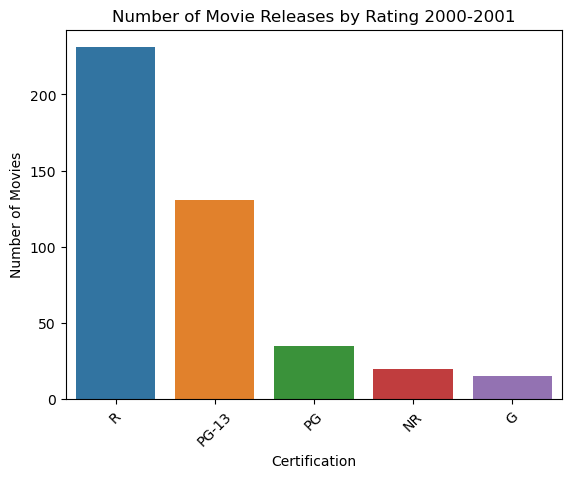

In [25]:
# Create a count plot
sns.countplot(data=df_movie_values, x='certification', order=cert_index)
plt.xticks(rotation=45) 
plt.xlabel("Certification") 
plt.ylabel("Number of Movies")
plt.title("Number of Movie Releases by Rating 2000-2001")

# Show the plot
plt.show()

- What is the average revenue per certification category?

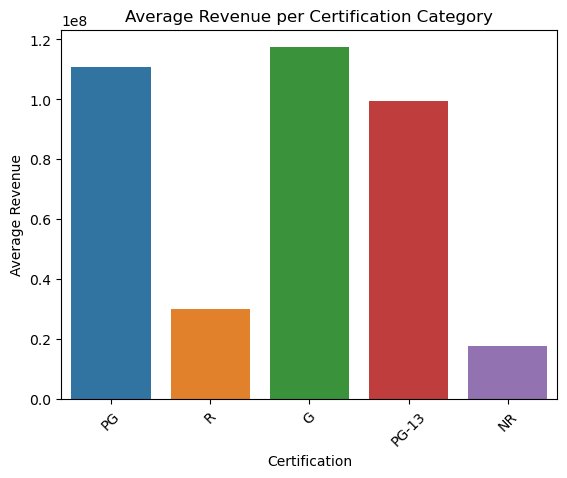

In [28]:
# Plot figure displaying average revenue by certification category 
sns.barplot(data=df_movie_values, x='certification', y='revenue', ci=None)  # ci=None removes confidence intervals
plt.xticks(rotation=45)
plt.xlabel("Certification")
plt.ylabel("Average Revenue")
plt.title("Average Revenue per Certification Category")
plt.show()

- What is the average budget per certification category?

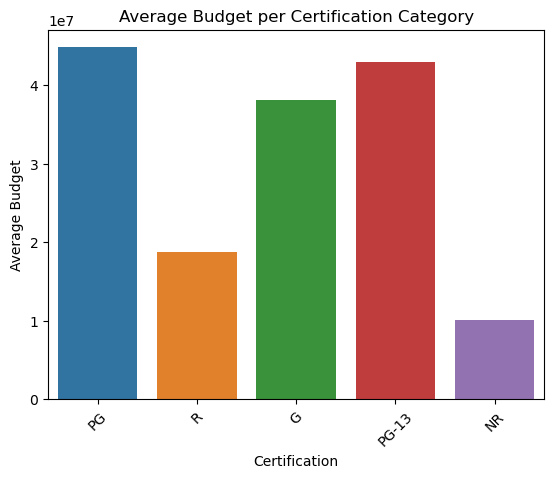

In [29]:
# Plot figure displaying average revenue by certification category 
sns.barplot(data=df_movie_values, x='certification', y='budget', ci=None)  # ci=None removes confidence intervals
plt.xticks(rotation=45)
plt.xlabel("Certification")
plt.ylabel("Average Budget")
plt.title("Average Budget per Certification Category")
plt.show()